In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.metrics import mean_absolute_error,root_mean_squared_error,r2_score

In [18]:
df=pd.read_csv(r"C:\Users\NTCUONG\notebook\training_LR\training3.csv")
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Ageofhouse,SalePrice
0,0.150095,0.342066,0.245505,0.823709,0.456088,0.456088,0.456088,0.0,0.456088,0.0,...,0.0,0.0,0.0,0.0,0.073461,0.444283,0.456088,0.440378,0.027335,208500
1,0.043704,0.309687,0.275454,0.858742,0.412917,0.412917,0.412917,0.0,0.206458,0.0,...,0.0,0.0,0.0,0.0,0.173726,0.400042,0.412917,0.398694,0.153434,181500
2,0.118371,0.270847,0.200518,0.890162,0.361130,0.000000,0.361130,0.0,0.361130,0.0,...,0.0,0.0,0.0,0.0,0.276877,0.347432,0.361130,0.348691,0.030301,223500
3,0.159663,0.311608,0.203805,0.859956,0.415478,0.000000,0.415478,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.066395,0.402442,0.415478,0.000000,0.453197,140000
4,0.094961,0.218296,0.199566,0.918118,0.291061,0.000000,0.291061,0.0,0.145531,0.0,...,0.0,0.0,0.0,0.0,0.297982,0.275967,0.291061,0.281036,0.027911,250000


In [19]:
corr=df.corr()

In [20]:
df.corr().sort_values("SalePrice",ascending=False).head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Ageofhouse,SalePrice
SalePrice,-0.187647,-0.404171,-0.150610,0.228495,-0.403474,-0.354273,-0.311037,-0.014314,-0.249109,-0.015982,...,0.041436,0.074595,0.079494,-0.039699,-0.220379,-0.415640,-0.375715,-0.190818,-0.581832,1.000000
Fireplaces,0.063249,0.007837,0.047980,-0.071319,0.006838,-0.066368,-0.018833,0.005340,0.010777,0.010396,...,0.005958,0.152924,0.031778,-0.011221,0.034248,0.000863,0.011667,0.074801,-0.139056,0.296401
MasVnrArea,0.226649,0.045938,0.020590,-0.232372,0.126856,0.070116,0.146934,0.039206,0.104347,-0.038813,...,0.008330,0.047443,-0.020110,-0.039165,0.070193,0.125313,0.093777,0.114912,-0.225699,0.286091
GarageArea,0.338253,0.162839,0.212572,-0.397094,0.355021,0.202603,0.348230,-0.012106,0.255043,-0.071831,...,0.002265,0.024850,-0.028577,-0.072354,0.234028,0.357993,0.259190,0.360551,-0.310870,0.250840
LotArea,-0.863094,-0.755708,-0.218895,1.000000,-0.917599,-0.639649,-0.765542,0.020686,-0.643130,0.009557,...,0.035842,0.031591,0.036059,-0.029195,-0.555556,-0.924604,-0.772368,-0.671901,-0.224720,0.228495
GarageCars,0.423849,0.232367,0.220673,-0.477601,0.425237,0.245790,0.398520,-0.011345,0.296085,-0.071124,...,0.003594,0.017486,-0.032757,-0.082006,0.277124,0.428144,0.324890,0.413761,-0.315702,0.219479
BsmtFinSF1,0.157114,0.096525,0.083294,-0.176603,0.153751,0.039327,0.138310,-0.021591,0.127488,0.063618,...,0.028868,0.072497,0.018856,-0.026515,0.129270,0.151753,0.132957,0.117896,-0.181597,0.209936
TotalBsmtSF,0.306169,0.325522,0.274670,-0.503970,0.455491,0.240865,0.399690,-0.029198,0.330091,-0.018536,...,0.010556,0.062309,-0.020677,-0.087436,0.313648,0.454333,0.346140,0.378087,-0.152333,0.208208
GrLivArea,0.602790,0.411877,0.242027,-0.653633,0.576926,0.373730,0.463320,-0.027909,0.391960,-0.025684,...,-0.018361,0.023221,-0.010039,-0.060111,0.392246,0.574364,0.469275,0.446161,0.065657,0.184438
OpenPorchSF,0.113680,-0.058095,0.053859,-0.105168,0.086041,0.032515,0.098391,0.014226,0.032429,-0.054175,...,-0.021118,0.019464,-0.009159,-0.024226,0.084887,0.083532,0.070389,0.097935,-0.142074,0.184272


In [21]:
def create_df(col_list):
    df_fs=df["SalePrice"]
    for col in col_list:
        df_fs=pd.concat([df[col],df_fs],axis=1)
    return df_fs

In [22]:
lr = LinearRegression()
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(n_estimators=10, random_state=42)
svr = SVR(kernel='rbf')

model = VotingRegressor(estimators=[
    ('lr', lr),
    ('dt', dt),
    ('rf', rf),
    ('svr', svr)
])


In [23]:
def eval(df_fs):
    X_train,X_test,y_train,y_test=train_test_split(df_fs.iloc[:,:-1],df_fs.iloc[:,-1],test_size=0.2,random_state=42)
    model.fit(X_train,y_train)
    y_pre=model.predict(X_test)
    k.append(i)
    mae.append(mean_absolute_error(y_test,y_pre))
    rmse.append(root_mean_squared_error(y_test,y_pre))
    r2.append(r2_score(y_test,y_pre))

### FEATURE SELECTION DEPEND ON CORRELATION MATRIX

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap='coolwarm')

In [24]:
c=corr.sort_values("SalePrice",ascending=False).head(10).index
c

Index(['SalePrice', 'Fireplaces', 'MasVnrArea', 'GarageArea', 'LotArea',
       'GarageCars', 'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea', 'OpenPorchSF'],
      dtype='object')

In [25]:
k, mae, rmse, r2 = [], [], [], []
for i in range(10,120):
    c=corr.sort_values("SalePrice",ascending=False).iloc[1:i,:].index
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

,K,MAE,RMSE,r2
0,10,35104.344532,58940.074652,0.547095
1,11,35159.971207,59330.244824,0.541078
2,12,34794.295510,59271.060947,0.541994
3,13,33866.120509,57485.086348,0.569179
4,14,34253.776596,57815.231341,0.564217
...,...,...,...,...
105,115,25810.231807,45376.212853,0.731563
106,116,25810.231807,45376.212853,0.731563
107,117,25810.231807,45376.212853,0.731563
108,118,25810.231807,45376.212853,0.731563


In [26]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
64,74,25655.498817,44055.784948,0.746958
109,119,25810.231807,45376.212853,0.731563
83,93,25810.231807,45376.212853,0.731563
82,92,25810.231807,45376.212853,0.731563
81,91,25810.231807,45376.212853,0.731563
...,...,...,...,...
2,12,34794.295510,59271.060947,0.541994
14,24,34860.638205,58801.350315,0.549224
16,26,35002.728513,59241.158388,0.542456
0,10,35104.344532,58940.074652,0.547095


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_13380\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_13380\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


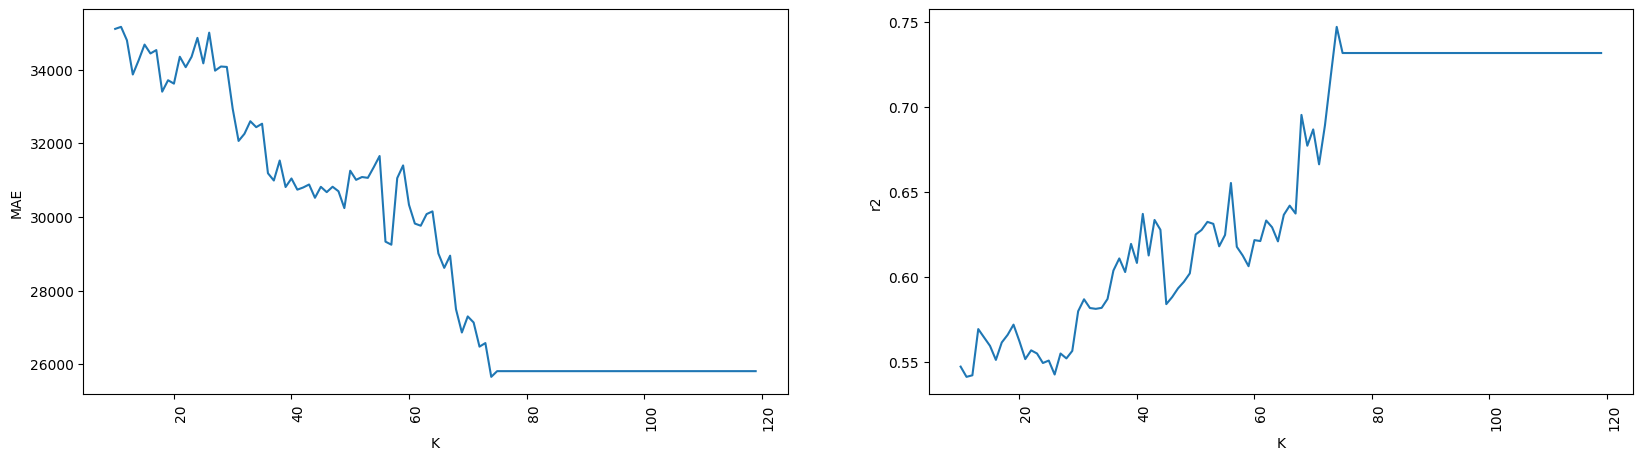

In [27]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### FEATURE SELECTION BY REMOVE FEATURE WITH LOW VARIENCE


### 1.CALCULATE VARIENCE FOR EACH FEATURE

In [28]:
varr=np.var(df)
varr

D:\miniconda\lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


MSSubClass       3.261390e-02
MSZoning         2.602904e-02
LotFrontage      5.107889e-03
LotArea          2.617374e-02
Street           2.493119e-02
                     ...     
YrSold           2.532877e-02
SaleType         3.044613e-02
SaleCondition    3.442249e-02
Ageofhouse       3.430254e-02
SalePrice        6.306789e+09
Length: 75, dtype: float64

In [29]:
varr.loc[varr > 0.1].index

Index(['SalePrice'], dtype='object')

### 2.USING VarianceThreshold FROM SKLEARN

In [30]:
from sklearn.feature_selection import VarianceThreshold

In [31]:
varr_thresh=VarianceThreshold(threshold=0.1)
varr_thresh.fit_transform(df)
selected_columns = df.columns[varr_thresh.get_support()]
selected_columns

Index(['SalePrice'], dtype='object')

In [32]:
k, mae, rmse, r2 = [], [], [], []
for i in range(100,500):
    varr_thresh=VarianceThreshold(threshold=i/100000)
    varr_thresh.fit_transform(df.iloc[:,:-1])
    selected_columns = df.iloc[:,:-1].columns[varr_thresh.get_support()]
    df_fs=create_df(selected_columns)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

,K,MAE,RMSE,r2
0,100,25662.441191,45256.945818,0.732972
1,101,25662.441191,45256.945818,0.732972
2,102,25662.441191,45256.945818,0.732972
3,103,25662.441191,45256.945818,0.732972
4,104,25662.441191,45256.945818,0.732972
...,...,...,...,...
395,495,26120.721688,45491.335449,0.730199
396,496,26120.721688,45491.335449,0.730199
397,497,26120.721688,45491.335449,0.730199
398,498,26120.721688,45491.335449,0.730199


In [33]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
0,100,25662.441191,45256.945818,0.732972
25,125,25662.441191,45256.945818,0.732972
26,126,25662.441191,45256.945818,0.732972
27,127,25662.441191,45256.945818,0.732972
28,128,25662.441191,45256.945818,0.732972
...,...,...,...,...
303,403,26120.721688,45491.335449,0.730199
302,402,26120.721688,45491.335449,0.730199
301,401,26120.721688,45491.335449,0.730199
315,415,26120.721688,45491.335449,0.730199


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_13380\873788412.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_13380\873788412.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


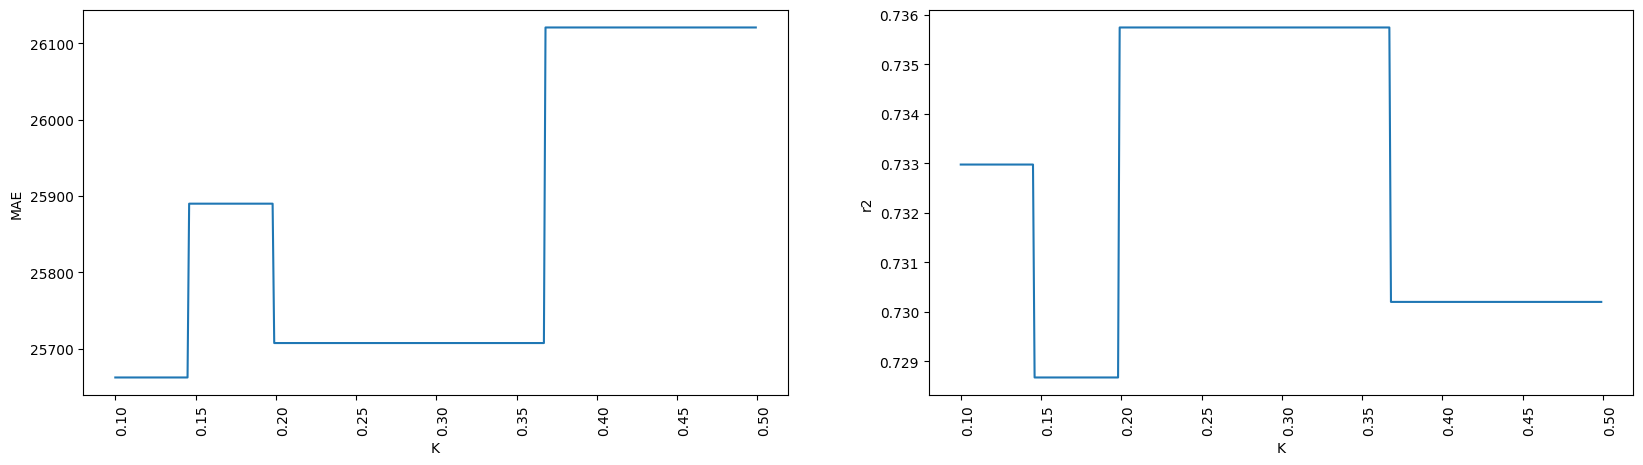

In [34]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x=statistic["K"]/1000,y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x=statistic["K"]/1000,y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### Univariate feature selection


### Statistic function (r_regression, f_regression, mutual_info_regression)

### 1. r_regression


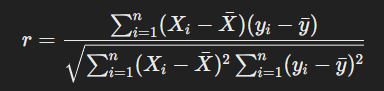

### Using numpy

In [35]:
def similitary_score(x,y):
    x_avg=np.average(x)
    y_avg=np.average(y)
    up=np.sum((x-x_avg)*(y-y_avg))
    down=np.sqrt(np.sum((x-x_avg)**2)*np.sum((y-y_avg)**2))
    return up/down

In [36]:
print(similitary_score(df["OverallQual"],df["SalePrice"]))

0.030435711798881705


In [37]:
top_feature=[]
for col in df.columns:
    score=similitary_score(df[col],df["SalePrice"])
    if col != "SalePrice" and score > 0.6:
        top_feature.append([col,score])
top_feature

[]

### Using sklearn

In [38]:
from sklearn.feature_selection import r_regression
from sklearn.feature_selection import SelectKBest
# for i in range(5,21):
fs=SelectKBest(r_regression,k=6)
fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
# selected=df.columns[fs.get_support()]
fs.get_feature_names_out()

array(['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'Fireplaces', 'GarageCars',
       'GarageArea'], dtype=object)

In [39]:
k, mae, rmse, r2 = [], [], [], []

for i in range(5,120):
    fs=SelectKBest(r_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic.to_csv("r_regression_label_enc.csv")
statistic


D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=75 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=76 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=77 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=78 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=79 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_un

,K,MAE,RMSE,r2
0,5,38757.582069,61999.884544,0.498850
1,6,38919.875879,62868.230262,0.484714
2,7,37141.217111,60950.835485,0.515665
3,8,34089.357541,57566.055217,0.567965
4,9,35025.359793,58833.650372,0.548729
...,...,...,...,...
110,115,25698.881567,45223.028674,0.733372
111,116,25698.881567,45223.028674,0.733372
112,117,25698.881567,45223.028674,0.733372
113,118,25698.881567,45223.028674,0.733372


In [40]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
114,119,25698.881567,45223.028674,0.733372
88,93,25698.881567,45223.028674,0.733372
87,92,25698.881567,45223.028674,0.733372
85,90,25698.881567,45223.028674,0.733372
84,89,25698.881567,45223.028674,0.733372
...,...,...,...,...
4,9,35025.359793,58833.650372,0.548729
5,10,35189.130084,59607.408718,0.536781
2,7,37141.217111,60950.835485,0.515665
0,5,38757.582069,61999.884544,0.498850


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_13380\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_13380\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


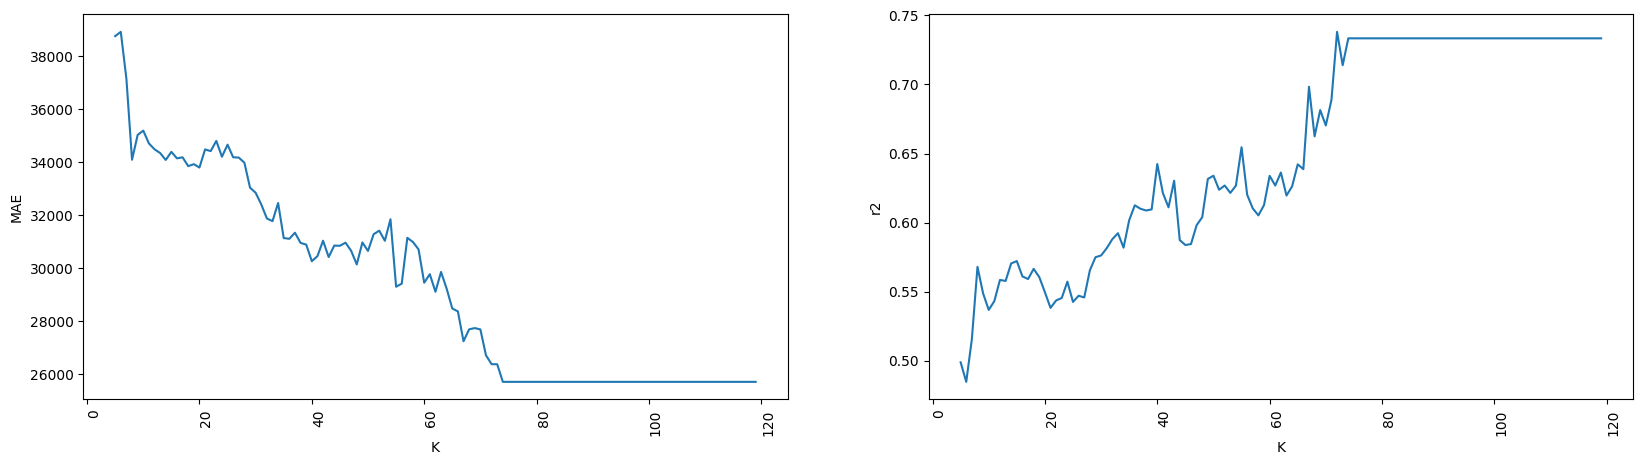

In [41]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### 2.f_regression

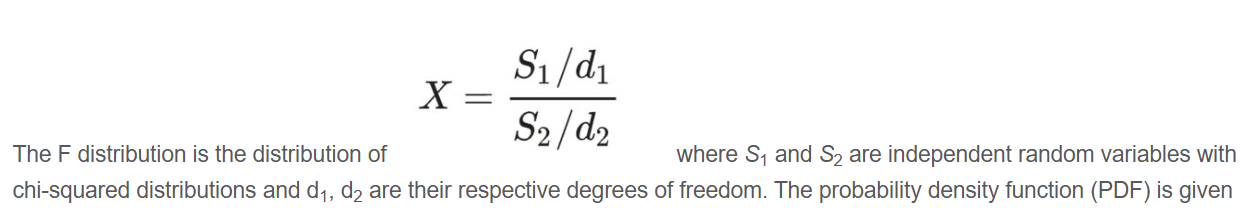

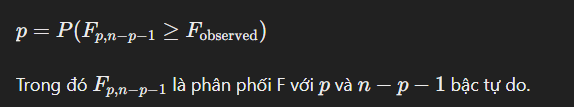

In [42]:
from sklearn.feature_selection import f_regression

In [43]:
k, mae, rmse, r2 = [], [], [], []
for i in range(5,120):
    fs=SelectKBest(f_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic.to_csv("f_regression_label_enc.csv")
statistic

D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=75 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=76 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=77 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=78 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=79 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_un

,K,MAE,RMSE,r2
0,5,37492.461525,57321.194931,0.571632
1,6,36923.718906,55427.961934,0.599462
2,7,36979.057293,55439.850243,0.599290
3,8,36606.326424,54699.326049,0.609923
4,9,37057.171130,55441.057546,0.599272
...,...,...,...,...
110,115,25698.881567,45223.028674,0.733372
111,116,25698.881567,45223.028674,0.733372
112,117,25698.881567,45223.028674,0.733372
113,118,25698.881567,45223.028674,0.733372


In [44]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
65,70,25416.554165,44904.035444,0.737120
60,65,25513.159591,44976.930320,0.736266
68,73,25662.441191,45256.945818,0.732972
87,92,25698.881567,45223.028674,0.733372
86,91,25698.881567,45223.028674,0.733372
...,...,...,...,...
3,8,36606.326424,54699.326049,0.609923
1,6,36923.718906,55427.961934,0.599462
2,7,36979.057293,55439.850243,0.599290
4,9,37057.171130,55441.057546,0.599272


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_13380\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_13380\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


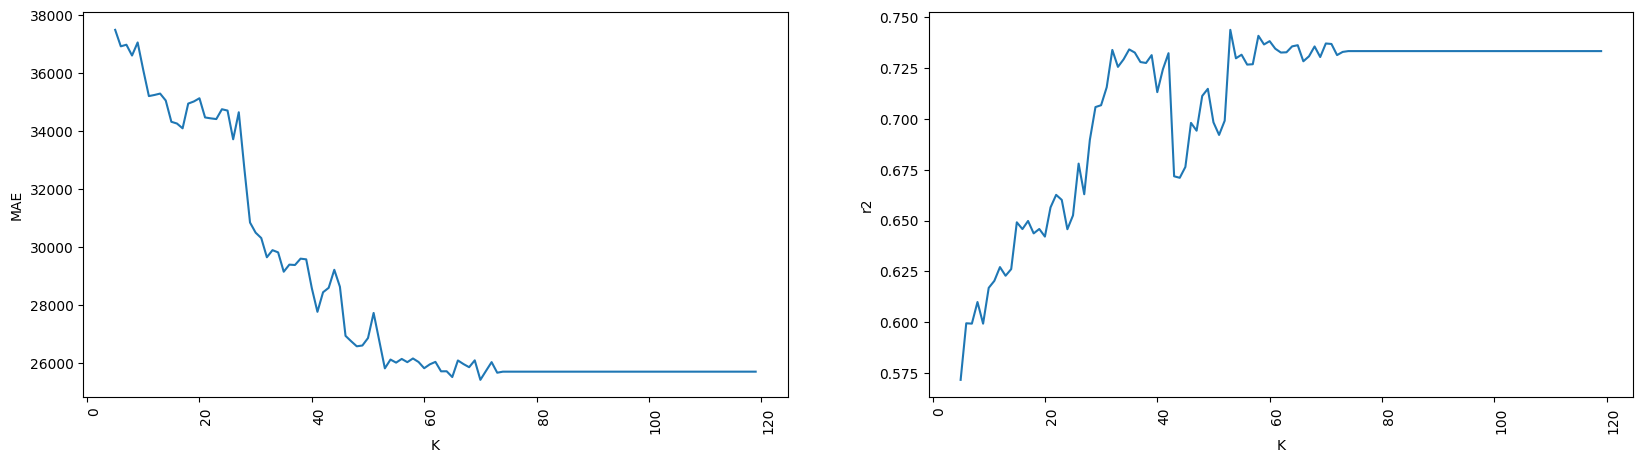

In [45]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### 3.Mutual infomation

### Fomula

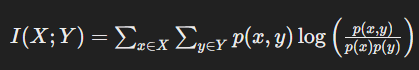

### Mesure dependency of 2 variable X,Y

### KDE method (Estimate Probability Density Function)

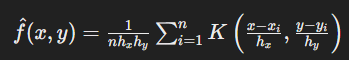

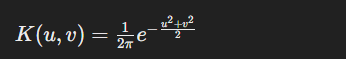

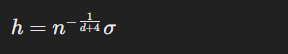

In [46]:
all_col=df.columns
all_col

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPor

In [47]:
from sklearn.feature_selection import mutual_info_regression

In [48]:
k, mae, rmse, r2 = [], [], [], []
for i in range(5,120):
    fs=SelectKBest(mutual_info_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=75 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=76 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=77 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=78 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=79 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_un

,K,MAE,RMSE,r2
0,5,37492.461525,57321.194931,0.571632
1,6,36923.718906,55427.961934,0.599462
2,7,36814.515776,54872.252674,0.607453
3,8,35881.821657,54095.861014,0.618483
4,9,35247.506075,53325.076631,0.629277
...,...,...,...,...
110,115,25698.881567,45223.028674,0.733372
111,116,25698.881567,45223.028674,0.733372
112,117,25698.881567,45223.028674,0.733372
113,118,25698.881567,45223.028674,0.733372


In [49]:
statistic.to_csv("mutual_infomation_label_enc.csv")

In [50]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
62,67,25218.736854,44740.495923,0.739032
66,71,25472.557701,44776.200706,0.738615
58,63,25497.282166,44724.886273,0.739214
55,60,25510.584075,45192.414891,0.733733
56,61,25515.527667,44697.452752,0.739534
...,...,...,...,...
4,9,35247.506075,53325.076631,0.629277
3,8,35881.821657,54095.861014,0.618483
2,7,36814.515776,54872.252674,0.607453
1,6,36923.718906,55427.961934,0.599462


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_13380\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_13380\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


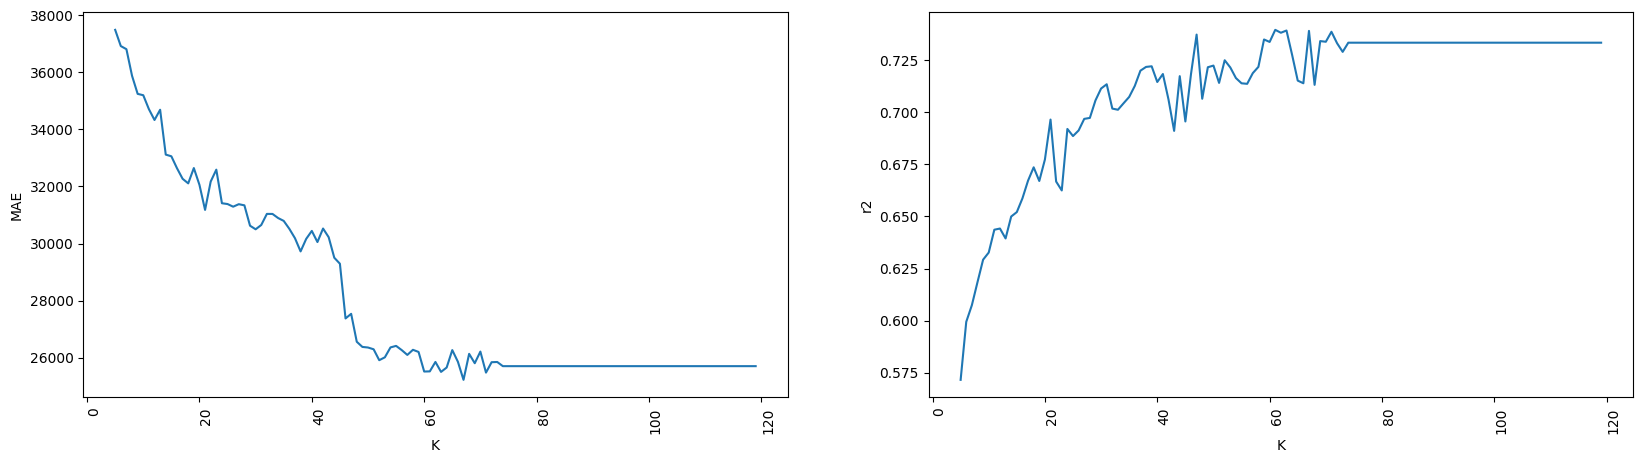

In [51]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### RFE (Recursive feature elimination)

df

from sklearn.feature_selection import RFE,RFECV
rfe=RFE(estimator=model,n_features_to_select=5)
rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
rfe.get_feature_names_out()

k, mae, rmse, r2 = [], [], [], []
for i in range(10,50):
    rfe=RFE(estimator=model,n_features_to_select=i)
    rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
    c = df.iloc[:,:-1].columns[rfe.support_]
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

statistic.to_csv("RFE.csv")

statistic=pd.read_csv("RFE.csv")

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

k, mae, rmse, r2 = [], [], [], []
for i in range(10,15):
    rfe=RFECV(estimator=model,min_features_to_select=i,cv=5)
    rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
    c = df.iloc[:,:-1].columns[rfe.support_]
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

statistic.to_csv("RFECV.csv")

In [52]:
r=pd.read_csv("r_regression_label_enc.csv")
r=r.iloc[:,1:]
r

,K,MAE,RMSE,r2
0,5,38757.582069,61999.884544,0.498850
1,6,38919.875879,62868.230262,0.484714
2,7,37141.217111,60950.835485,0.515665
3,8,34089.357541,57566.055217,0.567965
4,9,35025.359793,58833.650372,0.548729
...,...,...,...,...
110,115,25698.881567,45223.028674,0.733372
111,116,25698.881567,45223.028674,0.733372
112,117,25698.881567,45223.028674,0.733372
113,118,25698.881567,45223.028674,0.733372


In [53]:
f=pd.read_csv("f_regression_label_enc.csv")
f=f.iloc[:,1:]
f

,K,MAE,RMSE,r2
0,5,37492.461525,57321.194931,0.571632
1,6,36923.718906,55427.961934,0.599462
2,7,36979.057293,55439.850243,0.599290
3,8,36606.326424,54699.326049,0.609923
4,9,37057.171130,55441.057546,0.599272
...,...,...,...,...
110,115,25698.881567,45223.028674,0.733372
111,116,25698.881567,45223.028674,0.733372
112,117,25698.881567,45223.028674,0.733372
113,118,25698.881567,45223.028674,0.733372


In [54]:
mutual=pd.read_csv("mutual_infomation_label_enc.csv")
mutual=mutual.iloc[:,1:]
mutual

,K,MAE,RMSE,r2
0,5,37492.461525,57321.194931,0.571632
1,6,36923.718906,55427.961934,0.599462
2,7,36814.515776,54872.252674,0.607453
3,8,35881.821657,54095.861014,0.618483
4,9,35247.506075,53325.076631,0.629277
...,...,...,...,...
110,115,25698.881567,45223.028674,0.733372
111,116,25698.881567,45223.028674,0.733372
112,117,25698.881567,45223.028674,0.733372
113,118,25698.881567,45223.028674,0.733372


In [55]:
joint=pd.merge(r,f,how='inner',on="K")
joint

,K,MAE_x,RMSE_x,r2_x,MAE_y,RMSE_y,r2_y
0,5,38757.582069,61999.884544,0.498850,37492.461525,57321.194931,0.571632
1,6,38919.875879,62868.230262,0.484714,36923.718906,55427.961934,0.599462
2,7,37141.217111,60950.835485,0.515665,36979.057293,55439.850243,0.599290
3,8,34089.357541,57566.055217,0.567965,36606.326424,54699.326049,0.609923
4,9,35025.359793,58833.650372,0.548729,37057.171130,55441.057546,0.599272
...,...,...,...,...,...,...,...
110,115,25698.881567,45223.028674,0.733372,25698.881567,45223.028674,0.733372
111,116,25698.881567,45223.028674,0.733372,25698.881567,45223.028674,0.733372
112,117,25698.881567,45223.028674,0.733372,25698.881567,45223.028674,0.733372
113,118,25698.881567,45223.028674,0.733372,25698.881567,45223.028674,0.733372


In [56]:
joint=pd.merge(joint,mutual,on="K",how="inner")
joint

,K,MAE_x,RMSE_x,r2_x,MAE_y,RMSE_y,r2_y,MAE,RMSE,r2
0,5,38757.582069,61999.884544,0.498850,37492.461525,57321.194931,0.571632,37492.461525,57321.194931,0.571632
1,6,38919.875879,62868.230262,0.484714,36923.718906,55427.961934,0.599462,36923.718906,55427.961934,0.599462
2,7,37141.217111,60950.835485,0.515665,36979.057293,55439.850243,0.599290,36814.515776,54872.252674,0.607453
3,8,34089.357541,57566.055217,0.567965,36606.326424,54699.326049,0.609923,35881.821657,54095.861014,0.618483
4,9,35025.359793,58833.650372,0.548729,37057.171130,55441.057546,0.599272,35247.506075,53325.076631,0.629277
...,...,...,...,...,...,...,...,...,...,...
110,115,25698.881567,45223.028674,0.733372,25698.881567,45223.028674,0.733372,25698.881567,45223.028674,0.733372
111,116,25698.881567,45223.028674,0.733372,25698.881567,45223.028674,0.733372,25698.881567,45223.028674,0.733372
112,117,25698.881567,45223.028674,0.733372,25698.881567,45223.028674,0.733372,25698.881567,45223.028674,0.733372
113,118,25698.881567,45223.028674,0.733372,25698.881567,45223.028674,0.733372,25698.881567,45223.028674,0.733372


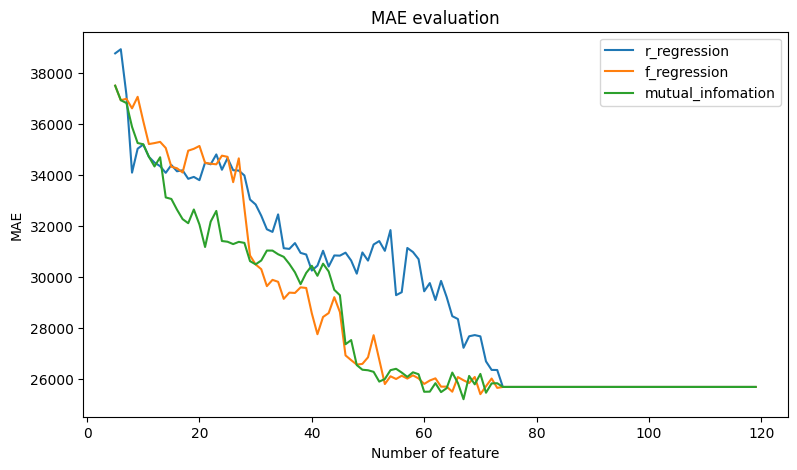

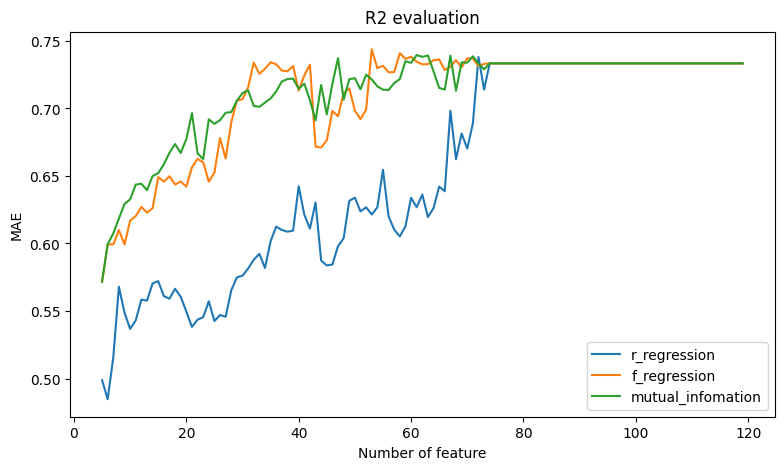

In [57]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(joint["K"],joint["MAE_x"],label="r_regression")
plt.plot(joint["K"],joint["MAE_y"],label="f_regression")
plt.plot(joint["K"],joint["MAE"],label="mutual_infomation")
plt.xlabel("Number of feature")
plt.ylabel("MAE")
plt.title("MAE evaluation") 
plt.legend()
plt.figure(figsize=(20,5))
plt.subplot(1,2,2)
plt.plot(joint["K"],joint["r2_x"],label="r_regression")
plt.plot(joint["K"],joint["r2_y"],label="f_regression")
plt.plot(joint["K"],joint["r2"],label="mutual_infomation")
plt.xlabel("Number of feature")
plt.ylabel("MAE")
plt.title("R2 evaluation") 
plt.legend()